# Анализ полученных фич

с использованием модуля feature_selector
https://proglib.io/p/feature-selector/

In [17]:
from feature_selector import FeatureSelector
import pandas as pd

In [18]:
#загружаем датасет
data = pd.read_csv('data4ml_6_cities.csv')
data_source = pd.read_csv('data.csv')

In [19]:
columns = list(set(data.columns) - set(['target']))
X = data[columns]
y = data['target']

columns_source = list(set(data_source.columns) - set(['target']))
X_source = data_source[columns_source]
y_source = data_source['target']

In [20]:
# Признаки - в train, метки - в train_labels
fs = FeatureSelector(data = X, labels = y)
fs_source = FeatureSelector(data = X_source, labels = y_source)

## Пропущенные значения

In [21]:
print('Обработанный датасет')
fs.identify_missing(missing_threshold = 0.6)
print('Исходный датасет')
fs_source.identify_missing(missing_threshold = 0.6)

Обработанный датасет
0 features with greater than 0.60 missing values.

Исходный датасет
4 features with greater than 0.60 missing values.



In [22]:
#посмотрим, в каких столбцах исходного датасета много пропущенных значений
fs_source.missing_stats.head(4)

,missing_fraction
private pool,0.988799
mls-id,0.933069
PrivatePool,0.892454
fireplace,0.726476


### Вывод
Удалять данные столбцы не нужно, так как в них пропущенные значения говорят о том, что эта характеристика отсутствует в доме.
Все пропущенные значения обработаны

## Коллинеарные признаки

In [23]:
print('Обработанный датасет')
fs.identify_collinear(correlation_threshold = 0.98)
print('Исходный датасет')
fs_source.identify_collinear(correlation_threshold = 0.98)

Обработанный датасет
12 features with a correlation magnitude greater than 0.98.

Исходный датасет
0 features with a correlation magnitude greater than 0.98.



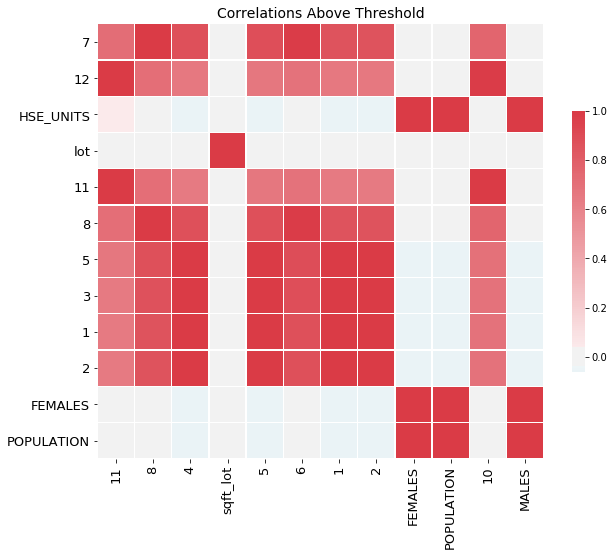

In [24]:
#Посмотрим на то, какие же признаки в обработанном датасете слишком взаимосвязаны
fs.plot_collinear()

### Вывод
В исходном датасете определить взаимосвязь признаков нельзя, так как они представляют собой не числовые данные
В обработанном датасете получились сильно взаимосвязаны данные по классам школ, что логично, так как школы все-таки содержат в себе несколько классов обучения.
Удалять столбцы не будем.

## Признаки с нулевой важностью

In [25]:
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'l2', 
                            n_iterations = 10, 
                            early_stopping = False)

zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



In [26]:
zero_importance_features

[]

## Признаки с низкой важностью

In [27]:
fs.identify_low_importance(cumulative_importance = 0.99)

43 features required for cumulative importance of 0.99 after one hot encoding.
13 features do not contribute to cumulative importance of 0.99.



In [28]:
#эти признаки предлагается удалить (10 штук)
fs.feature_importances.tail(11)

,feature,importance,normalized_importance,cumulative_importance
45,rent_sale,45.0,0.001500,0.993900
46,4,34.0,0.001133,0.995033
47,Heating,30.0,0.001000,0.996033
48,11,26.0,0.000867,0.996900
49,1,25.0,0.000833,0.997733
50,POPULATION,23.0,0.000767,0.998500
51,10,10.0,0.000333,0.998833
52,fp_count,10.0,0.000333,0.999167
53,MALES,9.0,0.000300,0.999467
54,2,9.0,0.000300,0.999767


In [29]:
#удалим признаки и сохраним новый датасет в отдельный файл
train_removed = fs.remove(methods = ['low_importance'])
train_removed['target'] = y

Removed 13 features.


In [30]:
train_removed.to_csv('data4ml_5.csv', encoding='utf-8', index=False)

In [31]:
train_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374333 entries, 0 to 374332
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   7                    374333 non-null  float64
 1   mal_femal            324802 non-null  float64
 2   pool                 374333 non-null  int64  
 3   8                    374333 non-null  float64
 4   street_hash          374333 non-null  int64  
 5   min_dist             374333 non-null  float64
 6   zipcode_int          374333 non-null  int64  
 7   9                    374333 non-null  float64
 8   vacant_units         324802 non-null  float64
 9   12                   374333 non-null  float64
 10  Cooling              374333 non-null  int64  
 11  VACANT               374333 non-null  float64
 12  price                374333 non-null  int64  
 13  Remodeled            374333 non-null  int64  
 14  PK                   374333 non-null  float64
 15  beds_square      